<a href="https://colab.research.google.com/github/HadjAmarNesrine/Los-Angeles-Crime-analysis-/blob/main/Los_Angeles_Crimes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
raw_data=pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df=raw_data.copy()
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
df=df.drop(columns=['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Mocodes','Premis Cd'])
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown')
df['Weapon Used Cd']=df['Weapon Used Cd'].fillna('Unknown')
df['Weapon Desc']=df['Weapon Desc'].fillna('Unknown')
df['Premis Desc']=df['Premis Desc'].fillna('Unknown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114456 entries, 0 to 114455
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           114456 non-null  int64  
 1   Date Rptd       114456 non-null  object 
 2   DATE OCC        114456 non-null  object 
 3   TIME OCC        114456 non-null  int64  
 4   AREA            114456 non-null  int64  
 5   AREA NAME       114456 non-null  object 
 6   Rpt Dist No     114456 non-null  int64  
 7   Part 1-2        114456 non-null  int64  
 8   Crm Cd          114456 non-null  int64  
 9   Crm Cd Desc     114456 non-null  object 
 10  Vict Age        114456 non-null  int64  
 11  Vict Sex        114456 non-null  object 
 12  Vict Descent    114456 non-null  object 
 13  Premis Desc     114456 non-null  object 
 14  Weapon Used Cd  114456 non-null  object 
 15  Weapon Desc     114456 non-null  object 
 16  Status          114456 non-null  object 
 17  Status Des

In [ ]:
 #Rename the columns :
 df = df.rename(columns={'DR_NO': 'record_number', 'Date Rptd': 'Date_reported','DATE OCC':'date_occured',
                'TIME OCC': 'Time_Occured', 'Rpt Dist No':'reporting_ditrict_number',
                 'Crm Cd':'Crime_code', 'Crm Cd Desc':'Crime Committed Description',
                 'Vict Age':'Victim Age', 'Vict Sex':'Victim Sex',
                 'Vict Descent':'Victim Descent',
                 'Premis Desc':'Premise Description','Weapon Used Cd':'Weapon Used Code',
                 'Weapon Desc':'Weapon Description','Status Desc':'Status Description',
                 'Lat':'Latitude', 'Lon':'Longitude', 'Dr_No':'Division of Records Number'})


In [ ]:
#columns type conversion :
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%m/%d/%Y %I:%M:%S %p')
df['date_occured'] = pd.to_datetime(df['date_occured'], format='%m/%d/%Y %I:%M:%S %p')
#Date Occured Converted to day, month and year
df['day'] = df['date_occured'].dt.strftime('%A')  # Full day of the week
df['month'] = df['date_occured'].dt.strftime('%B')  # Full month name
df['year'] = df['date_occured'].dt.strftime('%Y')

In [ ]:
df.head()

,record_number,Date_reported,date_occured,Time_Occured,AREA,AREA NAME,reporting_ditrict_number,Part 1-2,Crime_code,Crime Committed Description,...,Weapon Used Code,Weapon Description,Status,Status Description,LOCATION,LAT,LON,day,month,year
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Unknown,Unknown,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Sunday,March,2020
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Unknown,Unknown,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Saturday,February,2020
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Unknown,Unknown,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Wednesday,November,2020
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Unknown,Unknown,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Tuesday,March,2020
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Unknown,Unknown,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Monday,August,2020


In [ ]:
#create a function to convert the time occured column :
def convert_time(time_str):
    time_str = str(time_str).zfill(4) #to ensure the 4 digits
    hour = time_str[:2] #the first 2 digits
    minutes = time_str[2:] #the last 2 digits
    return f"{hour}:{minutes}"

In [ ]:
df['Time_Occured'] = df['Time_Occured'].apply(convert_time)

In [ ]:
df.head()

,record_number,Date_reported,date_occured,Time_Occured,AREA,AREA NAME,reporting_ditrict_number,Part 1-2,Crime_code,Crime Committed Description,...,Weapon Used Code,Weapon Description,Status,Status Description,LOCATION,LAT,LON,day,month,year
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Unknown,Unknown,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Sunday,March,2020
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Unknown,Unknown,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Saturday,February,2020
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,Unknown,Unknown,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Wednesday,November,2020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Unknown,Unknown,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Tuesday,March,2020
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Unknown,Unknown,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Monday,August,2020


In [ ]:
df = df.rename(columns={'Part 1-2': 'Category of Crime'})
df['Category of Crime'].value_counts()

,count
Category of Crime,
1,66205
2,48251


In [ ]:
df['Weapon Description'].value_counts()

,count
Weapon Description,
Unknown,72646
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22641
UNKNOWN WEAPON/OTHER WEAPON,4512
VERBAL THREAT,3012
HAND GUN,2277
...,...
ANTIQUE FIREARM,1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE,1
STRAIGHT RAZOR,1


In [ ]:
df['Victim Descent'].unique()

array(['O', 'X', 'H', 'B', 'W', 'Unknown', 'A', 'C', 'K', 'J', 'F', 'I',
       'V', 'S', 'P', 'Z', 'G', 'U', 'D', 'L'], dtype=object)

In [ ]:
# Define a mapping from codes to full descriptions
descent_mapping = {
    'O': 'Other',
    'X': 'Unknown',
    'H': 'Hispanic',
    'B': 'Black',
    'W': 'White',
    'Unknown': 'Unknown',
    'A': 'Asian',
    'C': 'Chinese',
    'K': 'Korean',
    'J': 'Japanese',
    'F': 'Filipino',
    'I': 'Indian',
    'V': 'Vietnamese',
    'S': 'Samoan',
    'P': 'Pacific Islander',
    'Z': 'Other (ethnicity)',
    'G': 'Guamanian',
    'U':'Hawaiian',
    'D': 'Dutch',
    'L': 'Latino',
    '-': 'Not Specified'
}
df['Victim Descent'] = df['Victim Descent'].map(descent_mapping)

In [ ]:
df.head()

,record_number,Date_reported,date_occured,Time_Occured,AREA,AREA NAME,reporting_ditrict_number,Category of Crime,Crime_code,Crime Committed Description,...,Weapon Used Code,Weapon Description,Status,Status Description,LOCATION,LAT,LON,day,month,year
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Unknown,Unknown,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Sunday,March,2020
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Unknown,Unknown,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Saturday,February,2020
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,Unknown,Unknown,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Wednesday,November,2020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Unknown,Unknown,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Tuesday,March,2020
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Unknown,Unknown,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Monday,August,2020


In [ ]:
df['Victim Descent'].value_counts()

,count
Victim Descent,
Hispanic,35381
Unknown,25174
White,24350
Black,16454
Other,9318
Asian,2494
Korean,465
Filipino,270
Chinese,247


In [ ]:
df['Victim Age'].describe()

,Victim Age
count,114456.000000
mean,30.032178
std,21.711514
min,-3.000000
25%,12.000000
50%,31.000000
75%,45.000000
max,99.000000


In [ ]:
#create a function to categorize victims age :
def categorize_age(age):
    if age <= 12:
        return 'Children'
    elif age <= 19:
        return 'Teenager'
    elif age <= 29:
        return 'Young Adult'
    elif age <= 39:
        return 'Adult'
    elif age <= 59:
        return 'Middle-Aged Adults'
    else:
        return 'Old'

In [ ]:
df['Age Group'] = df['Victim Age'].apply(categorize_age)

In [ ]:
df['Victim Age']

,Victim Age
0,0
1,47
2,19
3,19
4,28
...,...
114451,37
114452,51
114453,23
114454,13


In [ ]:
df['Status'].unique()

array(['AA', 'IC', 'JA', 'AO', 'JO'], dtype=object)

In [ ]:
df['Status Description'].unique()

array(['Adult Arrest', 'Invest Cont', 'Juv Arrest', 'Adult Other',
       'Juv Other'], dtype=object)

In [ ]:
status_mapping = status_mapping = {
    'Adult Arrest': 'Adult Arrested',
    'Invest Cont': 'Investigation Continued',
    'Juv Arrest': 'Juvenile Arrested',
    'Adult Other': 'Adult, Other Action',
    'Juv Other': 'Juvenile, Other Action',
    'UNK': 'Unknown'}
df['Status Description'] = df['Status Description'].map(status_mapping)

In [ ]:
df = df.drop(columns=['Status','Victim Age'])


In [ ]:
df.head()

,record_number,Date_reported,date_occured,Time_Occured,AREA,AREA NAME,reporting_ditrict_number,Category of Crime,Crime_code,Crime Committed Description,...,Weapon Used Code,Weapon Description,Status Description,LOCATION,LAT,LON,day,month,year,Age Group
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Unknown,Unknown,Adult Arrested,1900 S LONGWOOD AV,34.0375,-118.3506,Sunday,March,2020,Children
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Unknown,Unknown,Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,Saturday,February,2020,Middle-Aged Adults
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,Unknown,Unknown,Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,Wednesday,November,2020,Teenager
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Unknown,Unknown,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,Tuesday,March,2020,Teenager
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Unknown,Unknown,Investigation Continued,1900 TRANSIENT,34.0944,-118.3277,Monday,August,2020,Young Adult


## **EXPLORATORY DATA ANALYSIS (EDA):**
## **Crimes per area:**
**Through this part we gonna check the number of crimes in each area and figure out which are has experience the highest number of crimes in LOS ANGELES:**

In [ ]:
import seaborn as sns
df_top_crime = df['AREA NAME'].value_counts()
df_top_crime = pd.DataFrame(df_top_crime).reset_index()
df_top_crime = df_top_crime.rename(columns={'count':'number_crimes'})
df_top_crime = df_top_crime.head(10)

<ipython-input-28-ae6e268f852c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AREA NAME', y='number_crimes', data=df_top_crime, palette='flare_r')


<Axes: xlabel='AREA NAME', ylabel='number_crimes'>

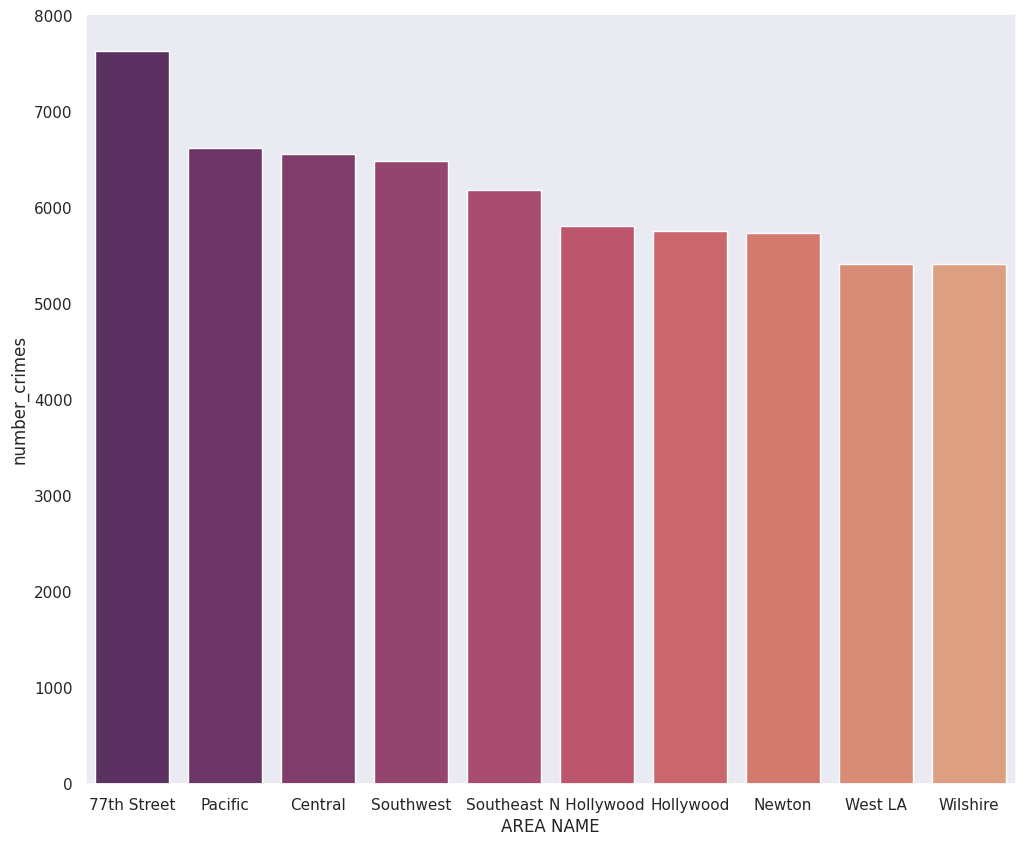

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="dark")
sns.barplot(x='AREA NAME', y='number_crimes', data=df_top_crime, palette='flare_r')


***These areas are the TOP 10 which experienced the highest numbers of crimes in LOS ANGELES.***





In [ ]:
df_top_crime = pd.DataFrame(df)
total_crimes_per_region = df.groupby('AREA NAME').size().reset_index(name='Total Crimes')
# Count the number of Type 1 crimes for each area
type1_crimes = df[df['Category of Crime'] == 1].groupby('AREA NAME').size().reset_index(name='Type 1 Crimes')
# Count the number of Type 2 crimes for each area
type2_crimes = df[df['Category of Crime'] == 2].groupby('AREA NAME').size().reset_index(name='Type 2 Crimes')

# Merge the three DataFrames into one
df_crime_summary = pd.merge(total_crimes_per_region, type1_crimes, on='AREA NAME', how='left')
df_crime_summary = pd.merge(df_crime_summary, type2_crimes, on='AREA NAME', how='left')


In [ ]:
df_crime_summary = df_crime_summary.sort_values(by='Total Crimes', ascending=False)


In [ ]:
df_crime_summary.head(10)

,AREA NAME,Total Crimes,Type 1 Crimes,Type 2 Crimes
0,77th Street,7634,4328,3306
12,Pacific,6625,4157,2468
1,Central,6557,3726,2831
15,Southwest,6493,3563,2930
14,Southeast,6190,3569,2621
8,N Hollywood,5812,3400,2412
6,Hollywood,5763,3257,2506
9,Newton,5742,3462,2280
18,West LA,5414,3286,2128
20,Wilshire,5412,3256,2156


In [ ]:
df_long = pd.melt(df_crime_summary, id_vars=['AREA NAME'], value_vars=['Type 1 Crimes', 'Type 2 Crimes'],
                  var_name='Crime Type', value_name='Crime Count')


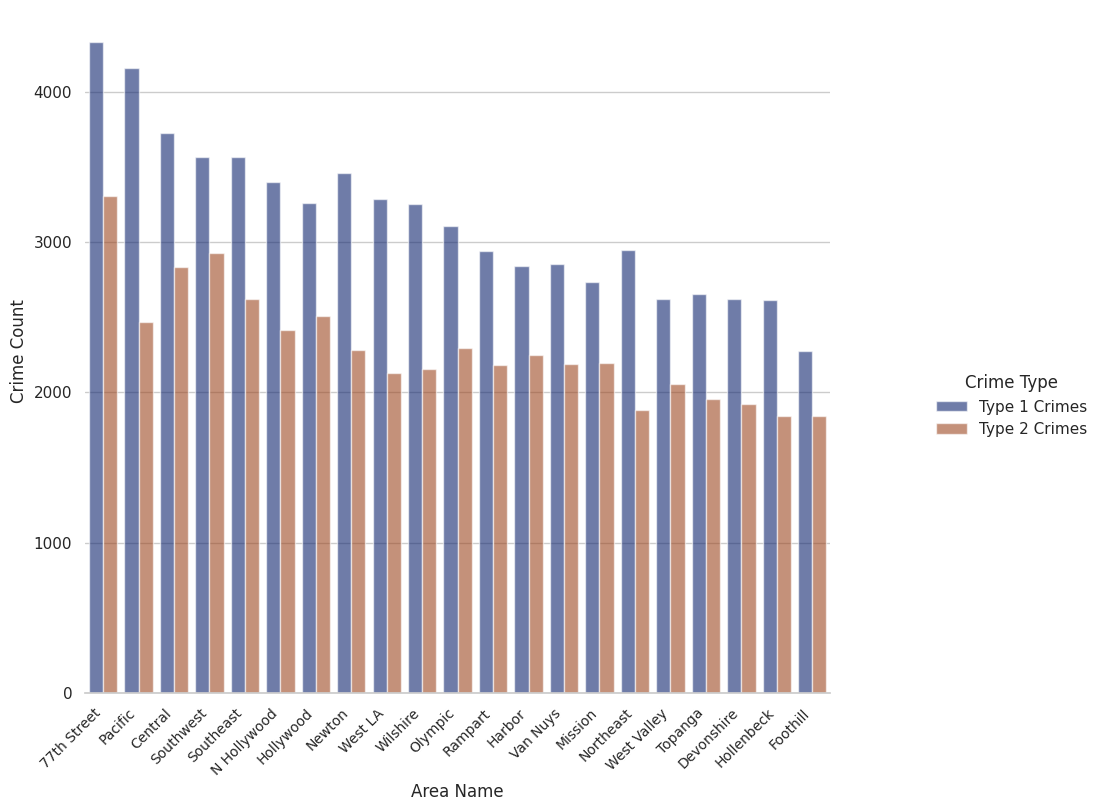

In [ ]:
sns.set_theme(style="whitegrid")

# Draw the barplot
g = sns.catplot(
    data=df_long, kind="bar",
    x="AREA NAME", y="Crime Count", hue="Crime Type",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

# Customize the plot
g.despine(left=True)
g.set_axis_labels("Area Name", "Crime Count")
g.legend.set_title("Crime Type")

g.fig.set_size_inches(12, 8)  # Adjust the figure size (width, height)
g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Smaller font size for x labels

# Show the plot
plt.show()

**This could indicate that certain areas are experiencing higher rates of violent crimes or major criminal activity, as Type 1 crimes are typically categorized as more serious**

In [ ]:
crime_counts = df.groupby(['AREA NAME', 'Crime Committed Description']).size().reset_index(name='Crime Count')
most_frequent_crimes = crime_counts.loc[crime_counts.groupby('AREA NAME')['Crime Count'].idxmax()]
result_df = most_frequent_crimes[['AREA NAME', 'Crime Committed Description', 'Crime Count']]
result_df

,AREA NAME,Crime Committed Description,Crime Count
88,77th Street,VEHICLE - STOLEN,896
96,Central,BATTERY - SIMPLE ASSAULT,812
245,Devonshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),381
335,Foothill,VEHICLE - STOLEN,571
431,Harbor,VEHICLE - STOLEN,646
510,Hollenbeck,VEHICLE - STOLEN,780
518,Hollywood,BATTERY - SIMPLE ASSAULT,488
690,Mission,VEHICLE - STOLEN,676
783,N Hollywood,VEHICLE - STOLEN,583
866,Newton,VEHICLE - STOLEN,890


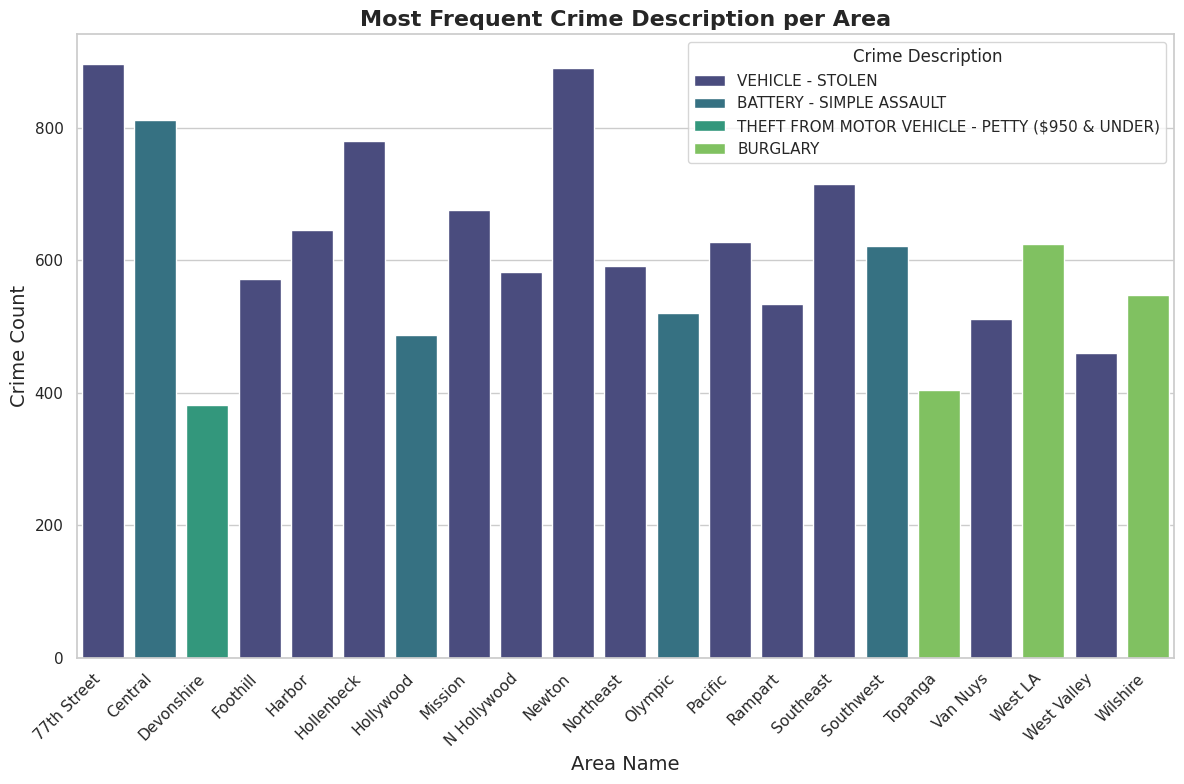

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create the barplot
sns.barplot(data=result_df,
            x='AREA NAME',
            y='Crime Count',
            hue='Crime Committed Description',
            palette='viridis',
            dodge=False)

# Customize the plot
plt.title('Most Frequent Crime Description per Area', fontweight='bold', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Crime Description", loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

**In this chart we show for each "area name" the crime description or its type and we can see that most cities the "vehicule stolen" was the highest followed by "Burglary"**






**Now let's see the most targeted "age category"**

In [ ]:
df['Age Group'].value_counts()

,count
Age Group,
Children,28733
Middle-Aged Adults,27641
Adult,22451
Young Adult,20232
Old,10664
Teenager,4735


**We can see that the most targeted category are children**

In [ ]:
#most targeted category per city :
new_df = df[['AREA NAME', 'Age Group',]]
new_df

,AREA NAME,Age Group
0,Wilshire,Children
1,Central,Middle-Aged Adults
2,Southwest,Teenager
3,Van Nuys,Teenager
4,Hollywood,Young Adult
...,...,...
114451,Central,Adult
114452,Rampart,Middle-Aged Adults
114453,Mission,Young Adult
114454,Southwest,Teenager


In [ ]:
frequency = df.groupby(['AREA NAME', 'Age Group']).size().unstack(fill_value=0)

# Use idxmax() to find the 'Age Group' with the highest frequency for each 'AREA NAME'
most_frequent_age_group = frequency.idxmax(axis=1)
most_frequent_age_group

,0
AREA NAME,
77th Street,Children
Central,Middle-Aged Adults
Devonshire,Children
Foothill,Middle-Aged Adults
Harbor,Children
Hollenbeck,Children
Hollywood,Children
Mission,Middle-Aged Adults
N Hollywood,Children


<ipython-input-39-bc33acd6eabb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=most_frequent_age_group, palette='Blues')


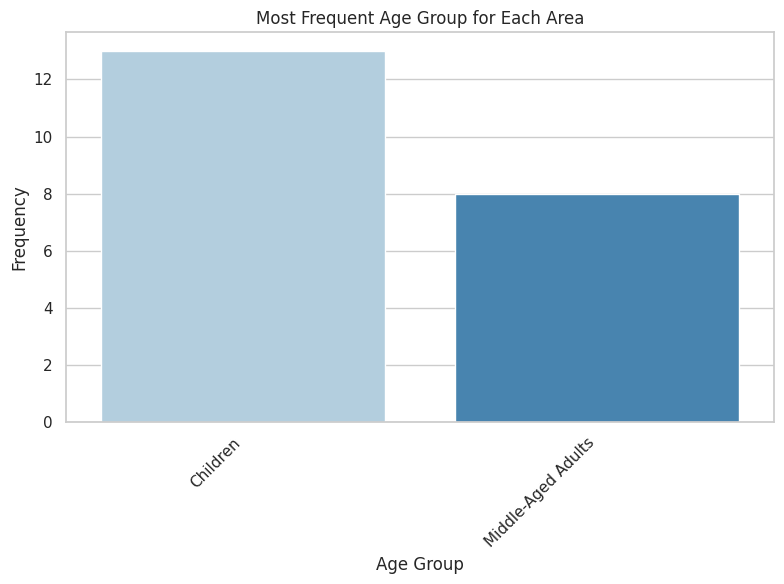

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=most_frequent_age_group, palette='Blues')
# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Most Frequent Age Group for Each Area')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**We can see that the most targeted category are children and Middle aged adults**

In [ ]:
# the most targeted gender :
dff=pd.DataFrame(df['Victim Sex'].value_counts().reset_index())
dff

,Victim Sex,count
0,M,48628
1,F,41735
2,Unknown,14488
3,X,9596
4,H,9


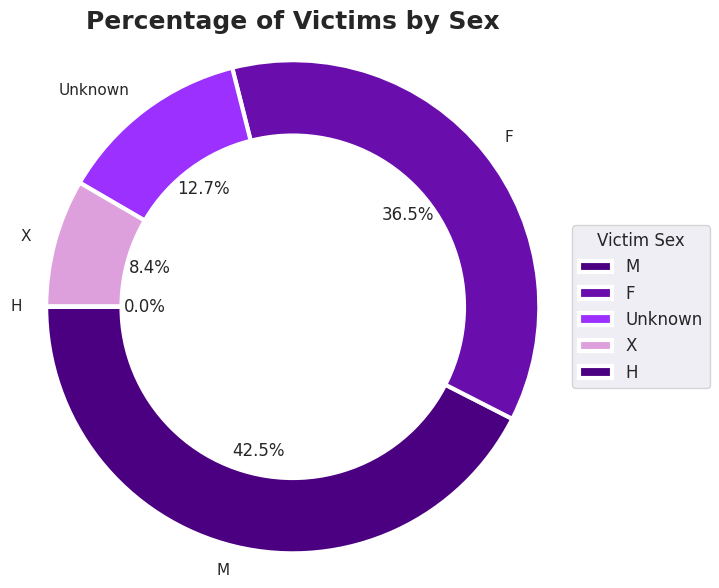

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#4B0082', '#6A0DAD', '#9B30FF', '#DDA0DD']
# Plotting the pie chart
plt.figure(figsize=(7,7))
sns.set(style='darkgrid')
plt.pie(dff['count'], labels=dff['Victim Sex'], autopct='%1.1f%%', startangle=180,
        colors=custom_colors, wedgeprops={'linewidth': 3})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(dff['Victim Sex'], title="Victim Sex", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.title('Percentage of Victims by Sex', fontweight='bold', fontsize=18, horizontalalignment='center')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.show()

**we can see that the male gender is the most targeted 42.5 % followed by the female gender 36.5%.other category ('H') was negligible, with a value of 0.0% which resulted in no representation in the chart.**

In [ ]:
crime_counts = df.groupby(['AREA NAME', 'Victim Descent']).size().reset_index(name='Crime Count')
most_frequent_crimes = crime_counts.loc[crime_counts.groupby('AREA NAME')['Crime Count'].idxmax()]
result_df = most_frequent_crimes[['AREA NAME', 'Victim Descent', 'Crime Count']]
result_df

,AREA NAME,Victim Descent,Crime Count
1,77th Street,Black,3037
17,Central,Hispanic,1667
38,Devonshire,Unknown,1269
45,Foothill,Hispanic,1881
56,Harbor,Hispanic,1871
68,Hollenbeck,Hispanic,2342
89,Hollywood,White,1891
94,Mission,Hispanic,2671
113,N Hollywood,White,2028
119,Newton,Hispanic,2825


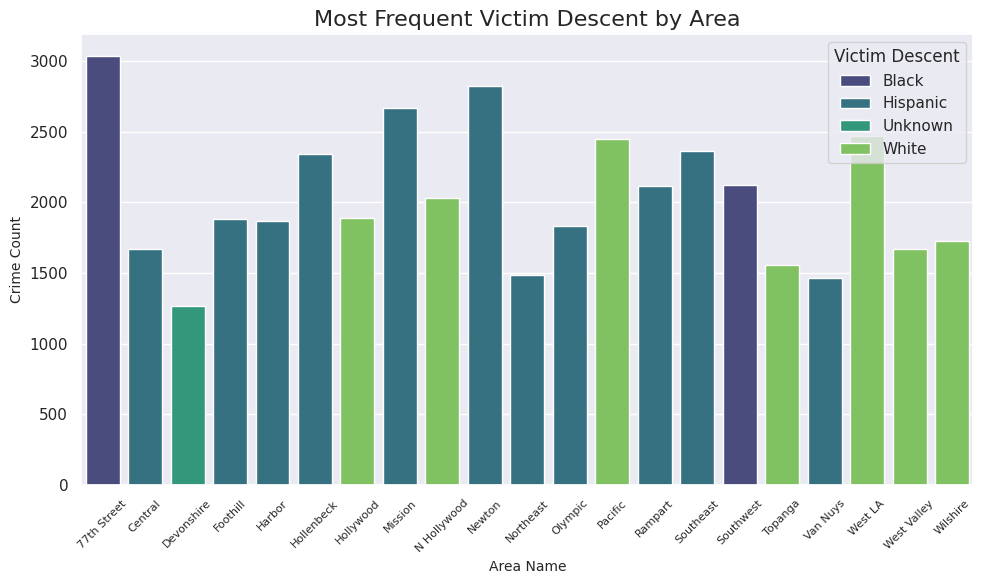

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x='AREA NAME', y='Crime Count', hue='Victim Descent', palette='viridis')


plt.title('Most Frequent Victim Descent by Area', fontsize=16)
plt.xlabel('Area Name', fontsize=10)
plt.ylabel('Crime Count', fontsize=10)


plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

**We can see through the bar plot that the most targeted ethnicity  Hispanic/Latin/Mexican  are the major victim. and many are unknown**

In [ ]:
# Filter the DataFrame to only include Category 1 and Category 2
filtered_df1 = df[(df['Category of Crime'] == 1)]
filtered_df2= df[(df['Category of Crime'] == 2)]

# Group by 'Weapon Description' and count occurrences
weapon_counts1 = filtered_df1['Weapon Description'].value_counts()
weapon_counts2 = filtered_df2['Weapon Description'].value_counts()

# Display the most used weapon(s)
most_used_weapon1= weapon_counts1.head(3)
most_used_weapon2 = weapon_counts2.head(3)
print(most_used_weapon1,   most_used_weapon2)


Weapon Description
Unknown                                           47466
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     5678
UNKNOWN WEAPON/OTHER WEAPON                        2538
Name: count, dtype: int64 Weapon Description
Unknown                                           25180
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    16963
VERBAL THREAT                                      2632
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

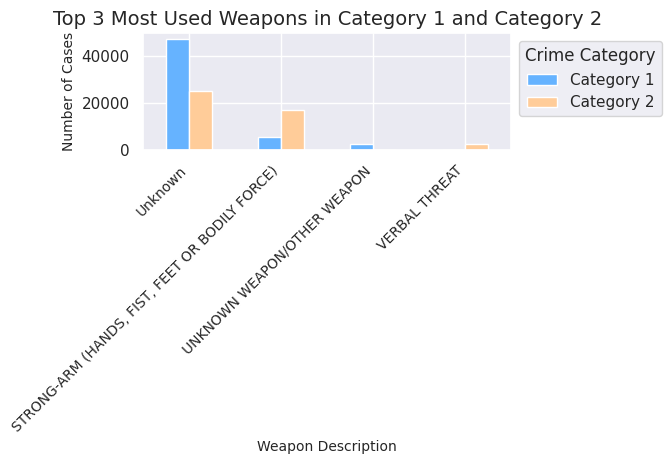

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include Category 1 and Category 2
filtered_df1 = df[df['Category of Crime'] == 1]
filtered_df2 = df[df['Category of Crime'] == 2]

# Group by 'Weapon Description' and count occurrences
weapon_counts1 = filtered_df1['Weapon Description'].value_counts().head(3)
weapon_counts2 = filtered_df2['Weapon Description'].value_counts().head(3)

# Combine the two into a single DataFrame for easier plotting
weapon_counts = pd.concat([weapon_counts1, weapon_counts2], axis=1)
weapon_counts.columns = ['Category 1', 'Category 2']
weapon_counts = weapon_counts.fillna(0)  # Fill any missing values with 0

# Plot
plt.figure(figsize=(10, 6))
weapon_counts.plot(kind='bar', stacked=False, color=['#66b3ff', '#ffcc99'])

# Customize the plot
plt.title("Top 3 Most Used Weapons in Category 1 and Category 2", fontsize=14)
plt.xlabel("Weapon Description", fontsize=10)
plt.ylabel("Number of Cases", fontsize=10)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.legend(title="Crime Category", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

**Strong arm (hands, fist, feet or bodily force) is by far the weapon used the most in carrying out crimes in Los Angeles within the considered period  according to the reports , But in Most cases there were not available data about the weapon used**

In [ ]:
contingency_table = pd.crosstab(df['Category of Crime'], df['Status Description'])
contingency_df = pd.DataFrame(contingency_table)
contingency_df.reset_index(inplace=True)
contingency_df


Status Description,Category of Crime,Adult Arrested,"Adult, Other Action",Investigation Continued,Juvenile Arrested,"Juvenile, Other Action"
0,1,5958,4795,55137,272,43
1,2,5723,10156,32063,168,141


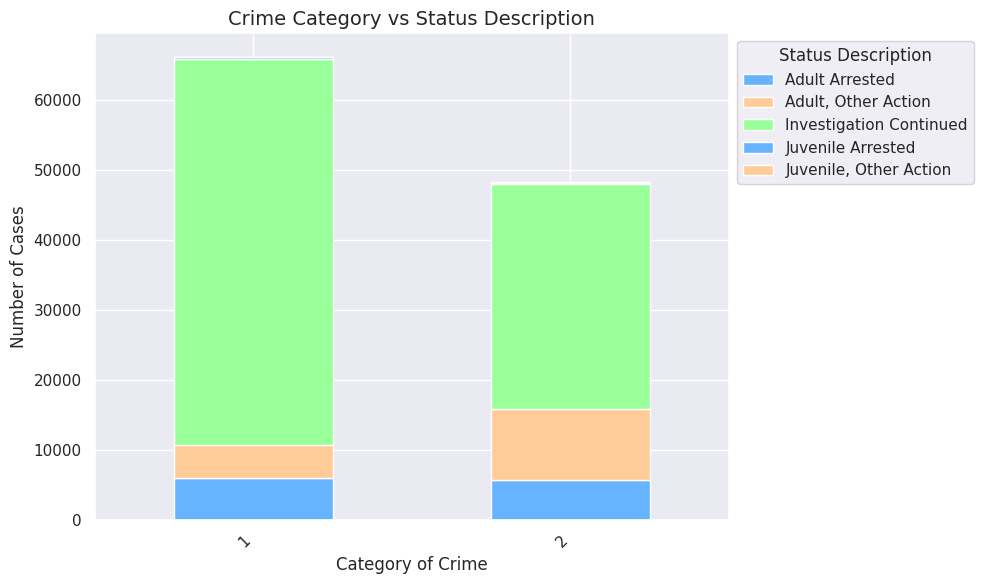

In [ ]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ffcc99', '#99ff99'])

# Customize plot
plt.title("Crime Category vs Status Description", fontsize=14)
plt.xlabel("Category of Crime", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Status Description", bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


****

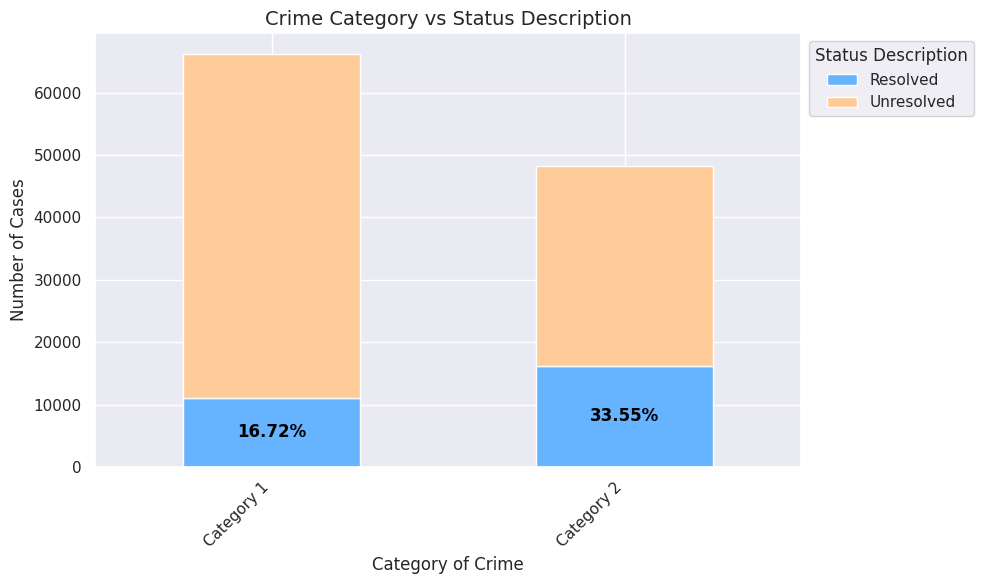

In [ ]:
category_1 = contingency_table.iloc[0]  # Category 1 (Row 0)
category_2 = contingency_table.iloc[1]  # Category 2 (Row 1)
# Calculate resolved and unresolved cases for Category 2
resolved_category_1 = category_1['Adult Arrested'] + category_1['Adult, Other Action'] + category_1['Juvenile Arrested'] + category_1['Juvenile, Other Action']
unresolved_category_1 = category_1['Investigation Continued']

# Calculate resolved and unresolved cases for Category 2
resolved_category_2 = category_2['Adult Arrested'] + category_2['Adult, Other Action'] + category_2['Juvenile Arrested'] + category_2['Juvenile, Other Action']
unresolved_category_2 = category_2['Investigation Continued']

# Calculate the percentage of resolved cases
resolved_percentage_category_1 = (resolved_category_1 / (resolved_category_1 + unresolved_category_1)) * 100
resolved_percentage_category_2 = (resolved_category_2 / (resolved_category_2 + unresolved_category_2)) * 100

# Prepare data for stacked bar plot
resolved_cases = [resolved_category_1, resolved_category_2]
unresolved_cases = [unresolved_category_1, unresolved_category_2]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Resolved': resolved_cases,
    'Unresolved': unresolved_cases
}, index=['Category 1', 'Category 2'])

# Plotting the stacked bar chart
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ffcc99'])

# Customize plot
plt.title("Crime Category vs Status Description", fontsize=14)
plt.xlabel("Category of Crime", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Status Description", bbox_to_anchor=(1, 1), loc='upper left')

# Add the percentage of resolved cases as annotations on the bars
ax.text(0, resolved_category_1 / 2, f"{resolved_percentage_category_1:.2f}%",
        color='black', ha='center', va='center', fontweight='bold')
ax.text(1, resolved_category_2 / 2, f"{resolved_percentage_category_2:.2f}%",
        color='black', ha='center', va='center', fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()



*   only 16.72 % of cases resolved in category crime type 1
*   33.55 % of cases resolved in category crime type 2

